In [8]:
import mne
import matplotlib as plt
%matplotlib inline
import os

In [90]:
"""
Was able to install the data from openneuro using openneuro-py (https://pypi.org/project/openneuro-py/#description)
Was very easy to use, could download just a specific file or the entire project
"""

'\nWas able to install the data from openneuro using openneuro-py (https://pypi.org/project/openneuro-py/#description)\nWas very easy to use, could download just a specific file or the entire project\n'

In [41]:
"""
Data found at: https://openneuro.org/datasets/ds005530/versions/1.0.7

This is a sleep dataset, seeing how patients brains react during REM sleep. 

Participants rated the arousal of 48 affective images paired with semantically matching sounds. 
Half of these sounds were cued during REM in the subsequent overnight sleep cycle. 
Participants rated the images in an MRI scanner with pulse oximetry 48 hours after encoding, and again two weeks later.

This EEG has 10 channels, each channel representing the electrical difference between two electrodes.
For this example, we will use subject 01122021301 1st sleep run data

"""

'\nData found at: https://openneuro.org/datasets/ds005530/versions/1.0.7\n\nThis is a sleep dataset, seeing how patients brains react during REM sleep. \n\nParticipants rated the arousal of 48 affective images paired with semantically matching sounds. \nHalf of these sounds were cued during REM in the subsequent overnight sleep cycle. \nParticipants rated the images in an MRI scanner with pulse oximetry 48 hours after encoding, and again two weeks later.\n\nThis EEG has 10 channels, each channel representing the electrical difference between two electrodes.\nFor this example, we will use subject 01122021301 1st sleep run data\n\n'

In [89]:
path = "/Users/anshulchiranth/ds005530/sub-01122021301/eeg/sub-01122021301_task-sleep_run-01_eeg.vhdr"
fname = "sub-01122021301_task-sleep_run-01_eeg.vhdr"

In [91]:
#Can read a .vhdr to mne with read_raw_brainvision
raw = mne.io.read_raw_brainvision(path)

Extracting parameters from /Users/anshulchiranth/ds005530/sub-01122021301/eeg/sub-01122021301_task-sleep_run-01_eeg.vhdr...
Setting channel info structure...


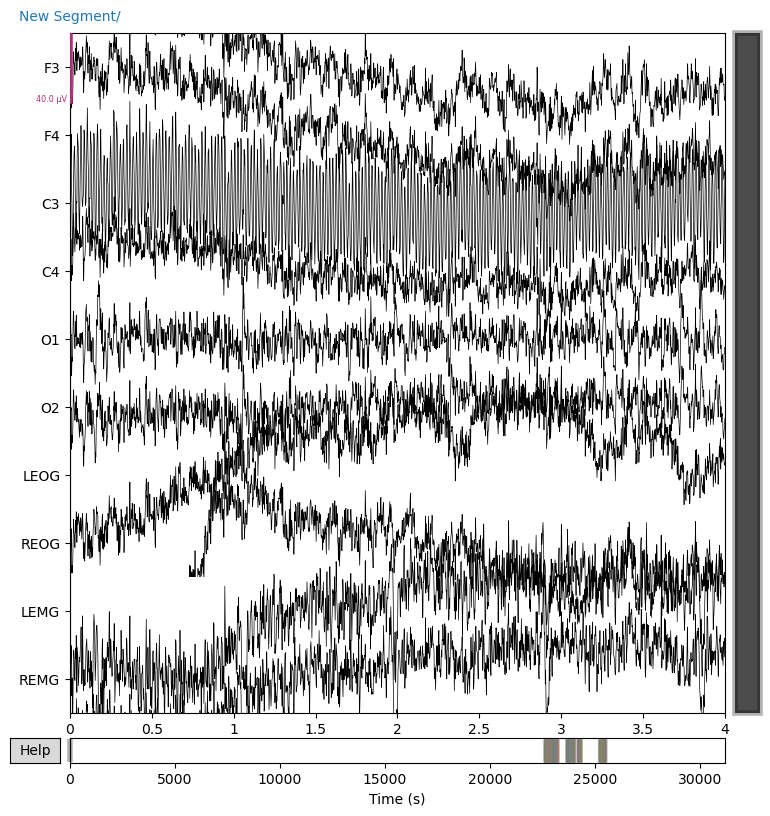

In [46]:
#Have set duration to 4 seconds, other important params may be start time (in seconds) or number of channels
#show_scrollbars, still can't figure out how to enable it though!
raw.plot(duration = 4.0,show_scrollbars=True);

In [51]:
#10 channel names from this EEG
raw.info
raw.info['ch_names']

<Info | 7 non-empty values
 bads: []
 ch_names: F3, F4, C3, C4, O1, O2, LEOG, REOG, LEMG, REMG
 chs: 10 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2021-11-29 22:53:02 UTC
 nchan: 10
 projs: []
 sfreq: 500.0 Hz
>

['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'LEOG', 'REOG', 'LEMG', 'REMG']

In [57]:
#Can find the specific events that happen during this EEG. In this context, the stimulus would be the sounds that are cued during the REM sleep
events = mne.events_from_annotations(raw)
events

Used Annotations descriptions: ['New Segment/', 'Stimulus/S102', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106', 'Stimulus/S108', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S114', 'Stimulus/S117', 'Stimulus/S118', 'Stimulus/S127', 'Stimulus/S128', 'Stimulus/S129', 'Stimulus/S134', 'Stimulus/S135', 'Stimulus/S138', 'Stimulus/S139', 'Stimulus/S140', 'Stimulus/S141', 'Stimulus/S142', 'Stimulus/S145', 'Stimulus/S146', 'Stimulus/S148', 'Stimulus/S199']


(array([[       0,        0,    99999],
        [11280614,        0,      199],
        [11280615,        0,      135],
        ...,
        [12772248,        0,      135],
        [12773952,        0,      114],
        [12775158,        0,      146]]),
 {'New Segment/': 99999,
  'Stimulus/S102': 102,
  'Stimulus/S104': 104,
  'Stimulus/S105': 105,
  'Stimulus/S106': 106,
  'Stimulus/S108': 108,
  'Stimulus/S111': 111,
  'Stimulus/S112': 112,
  'Stimulus/S113': 113,
  'Stimulus/S114': 114,
  'Stimulus/S117': 117,
  'Stimulus/S118': 118,
  'Stimulus/S127': 127,
  'Stimulus/S128': 128,
  'Stimulus/S129': 129,
  'Stimulus/S134': 134,
  'Stimulus/S135': 135,
  'Stimulus/S138': 138,
  'Stimulus/S139': 139,
  'Stimulus/S140': 140,
  'Stimulus/S141': 141,
  'Stimulus/S142': 142,
  'Stimulus/S145': 145,
  'Stimulus/S146': 146,
  'Stimulus/S148': 148,
  'Stimulus/S199': 199})

/var/folders/q2/pyrq5k_s7gz_4v527qy_7lcc0000gn/T/ipykernel_2120/2452390008.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events[0]);


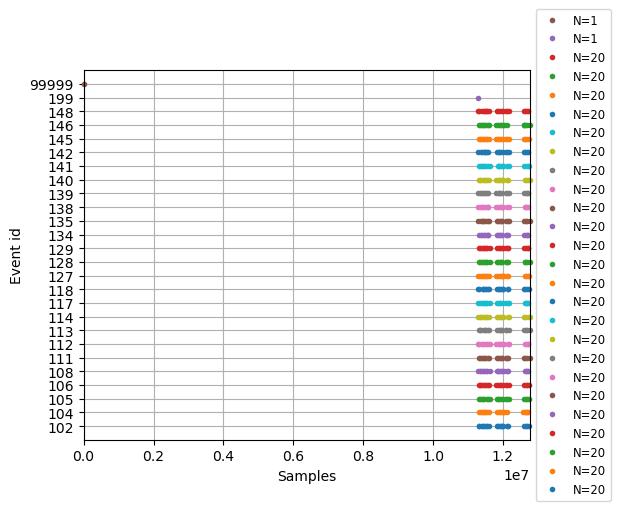

In [69]:
#sfreq param? Can change the x axis to be in terms of seconds but unsure what that entails
mne.viz.plot_events(events[0]);

In [62]:
mne.viz.plot_events?

In [74]:
mne.preprocessing.ICA?

In [82]:
#Number of components must be less than or equal to number of channels, will set at 3 for right now.
#Random state is necessary to initialize the ICA. ICA is fundamentally a statistical method, so we are controlling its randomness
#By setting it to a constant (in this case 5), we can ensure that the ICA is the same every time that we run it
#Can set method of doing ICA to fastica, picard, or infomax, refer to word doc for how these work
ica = mne.preprocessing.ICA(n_components=5,random_state=5)

In [83]:
ica.fit(raw.copy())

Fitting ICA to data using 10 channels (please be patient, this may take a while)
Selecting by number: 5 components
Fitting ICA took 26.2s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,32 iterations on raw data (15598890 samples)
ICA components,5
Available PCA components,10
Channel types,eeg
ICA components marked for exclusion,—


In [87]:
#In this specific example, head and sensor digitization is listed as unavailable, unable to produce ICA. 
#Assuming it means it doesn't know where specifically on head sensors are located, therefore is having trouble creating ICA
#Refer to raw.info in cell below
ica.plot_components();

RuntimeError: No digitization points found.

In [88]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: F3, F4, C3, C4, O1, O2, LEOG, REOG, LEMG, REMG
 chs: 10 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2021-11-29 22:53:02 UTC
 nchan: 10
 projs: []
 sfreq: 500.0 Hz
>